# Pair Programming Encoding

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:

- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.

-  Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.

- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

 

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Para evitar que salgan los warnings en jupyter
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/df_norm_estand.csv", index_col = 0)
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust
358,52,female,38.38,2,no,northeast,11396.9002,0.308088,0.52,1.077930,0.5
394,45,female,33.10,0,no,southwest,7345.0840,0.186598,0.24,0.419576,-0.5
494,62,male,21.40,0,no,southwest,12957.1180,0.354870,0.92,-1.039277,-0.5
1091,38,female,30.21,3,no,northwest,7537.1639,0.192357,-0.04,0.059227,1.0
930,22,male,28.88,0,no,northeast,2250.8352,0.033851,-0.68,-0.106608,-0.5


# Decidimos si tienen o no orden

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

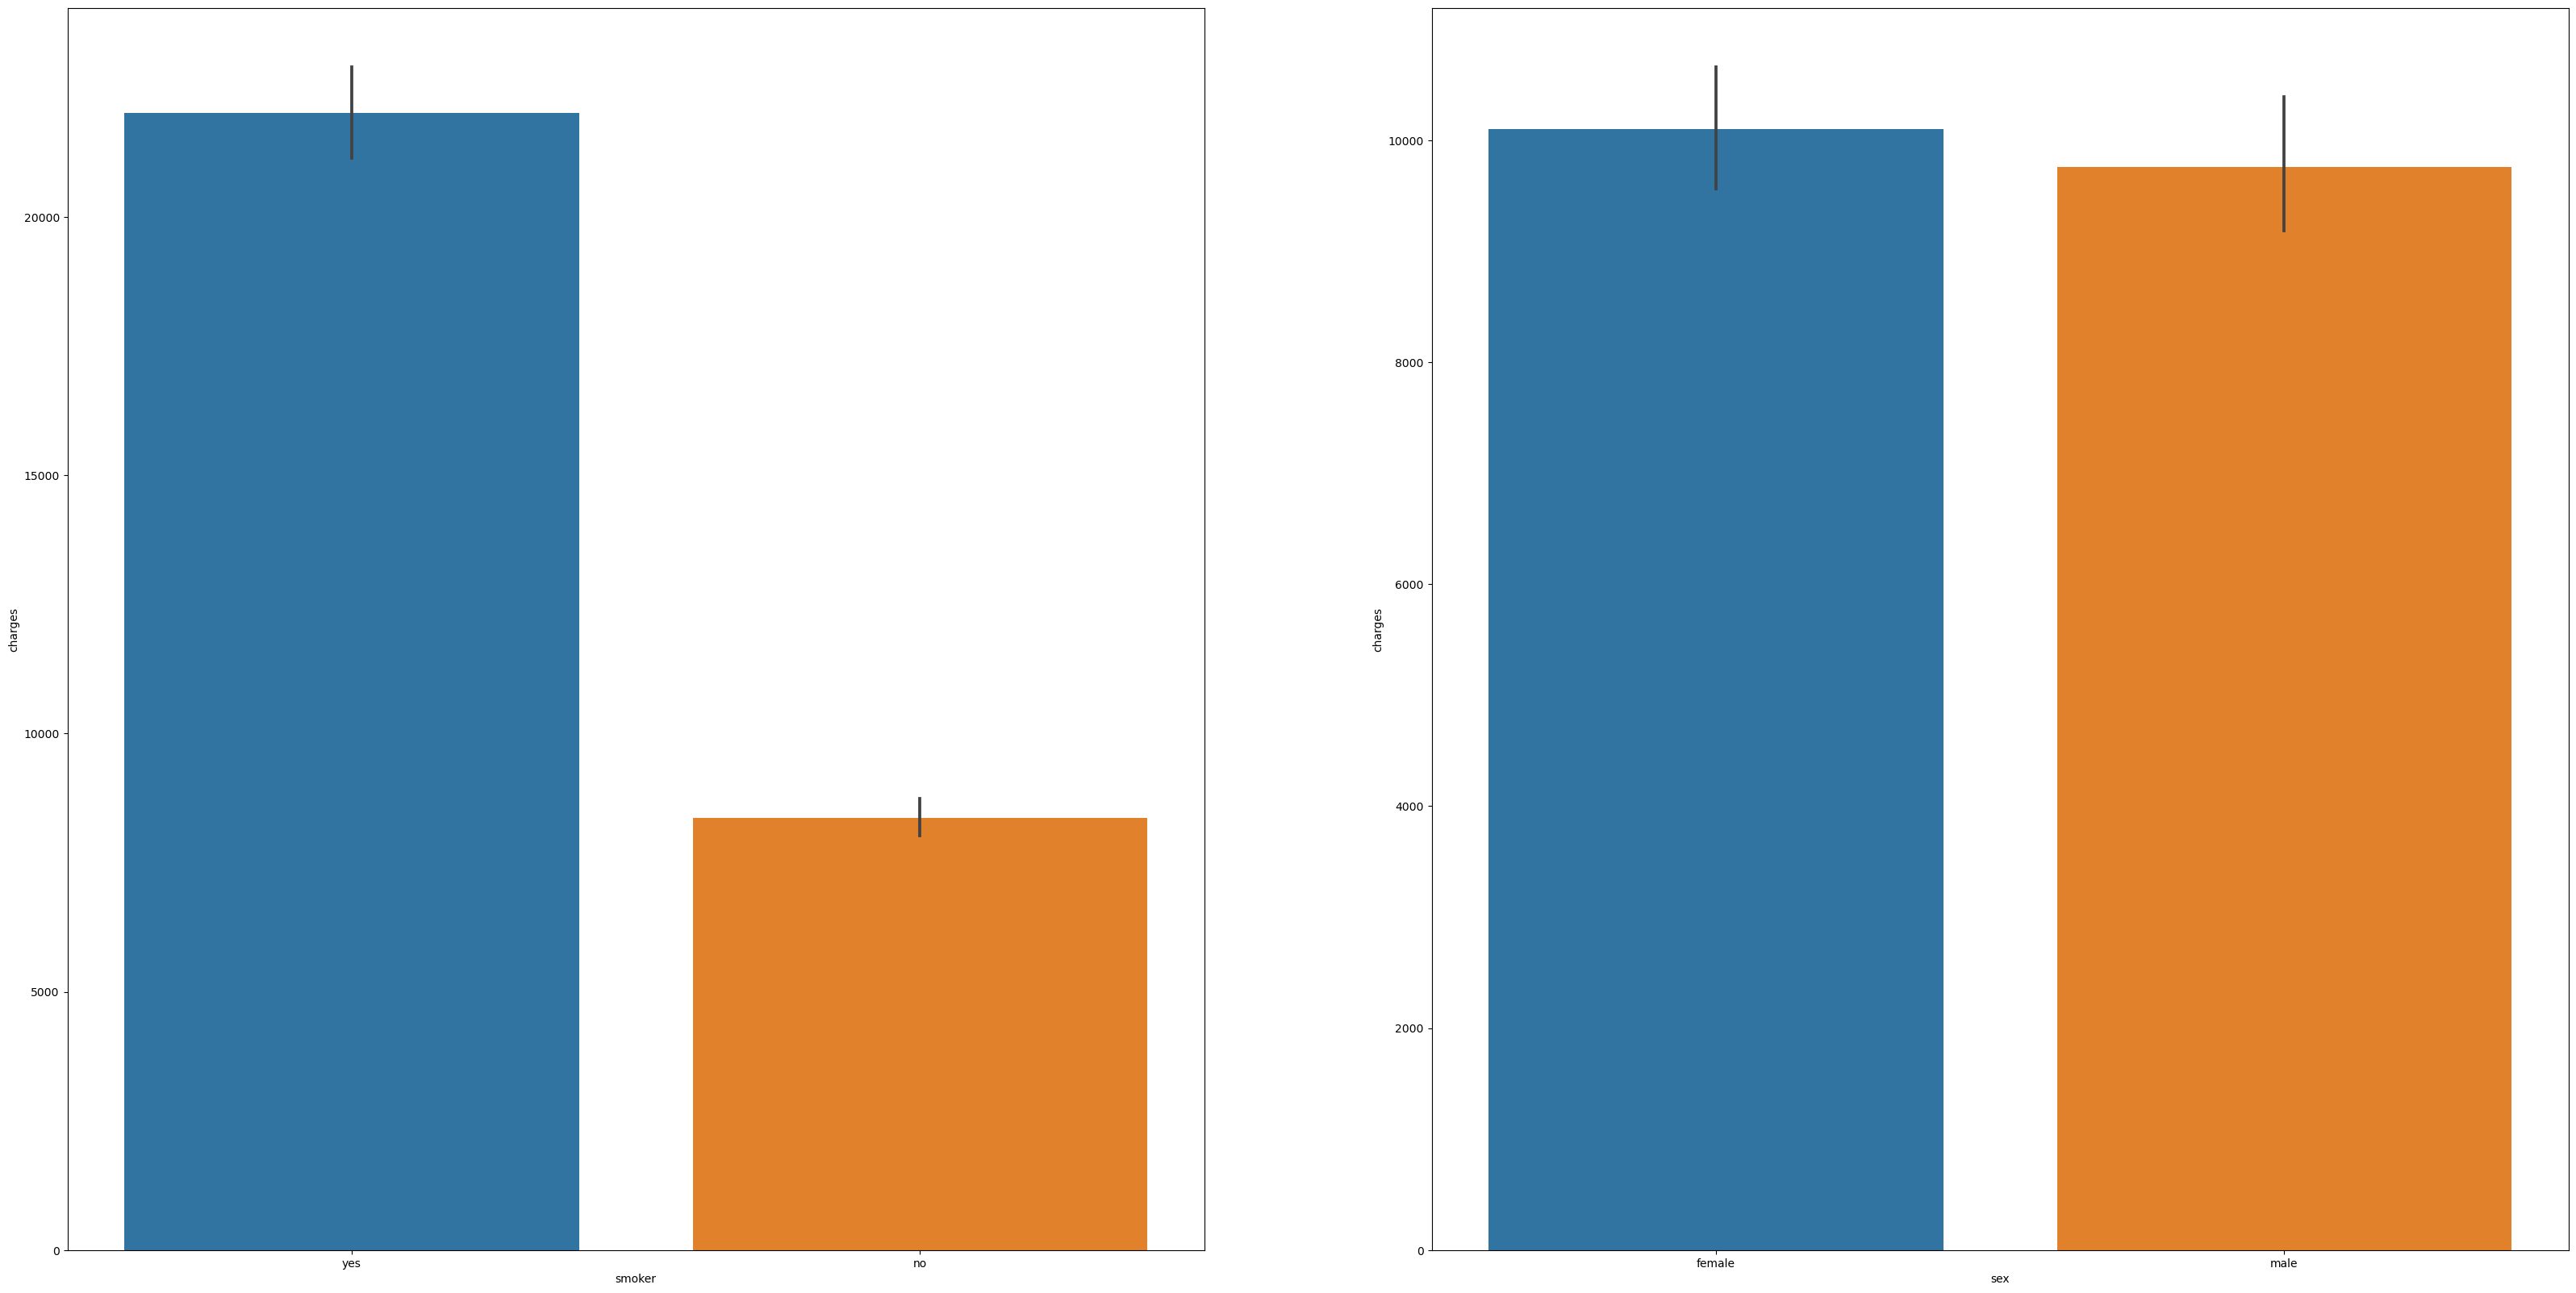

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (40, 20))
sns.barplot (x='smoker', y='charges', data= df, ax= axes[0])
sns.barplot (x='sex', y='charges', data= df, ax= axes[1]);

Concluimos que 'smoker' sí es ordinal viendo la diferencia. 'sex' no, al igual que 'region' como pudimos ver en el pair anterior.

## Columna 'smoker'

In [5]:
ordinal_dict = {'no':0, 'yes': 1}

df['smoker_map'] = df['smoker'].map(ordinal_dict) #Aplicamos un map, tenemos muy pocos valores únicos y nos parece el método más sencillo

In [6]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map
485,20,female,31.79,2,no,southeast,3056.3881,0.058005,-0.76,0.256234,0.5,0
439,18,female,25.08,0,no,northeast,2196.4732,0.032221,-0.84,-0.580424,-0.5,0
829,19,female,23.40,2,no,southwest,2913.5690,0.053722,-0.80,-0.789900,0.5,0


## Columna sex

In [7]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:

dummies = pd.get_dummies(df["sex"], prefix_sep = "_", prefix = "sex", dtype = int)  #Codificamos con el método dummies, que nos separa  por columnas 
dummies.head(2)

,sex_female,sex_male
0,1,0
1,0,1


In [9]:

df_dummies = pd.concat([df, dummies], axis = 1) #Lo unimos al dataset. 1 cuando es de ese sexo, 0  cuando no.
df_dummies.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map,sex_female,sex_male
0,19,female,27.90,0,yes,southwest,16884.9240,0.472641,-0.80,-0.228803,-0.5,1,1,0
1,18,male,33.77,1,no,southeast,1725.5523,0.018101,-0.84,0.503117,0.0,0,0,1


## Columna region

<AxesSubplot:xlabel='region', ylabel='charges'>

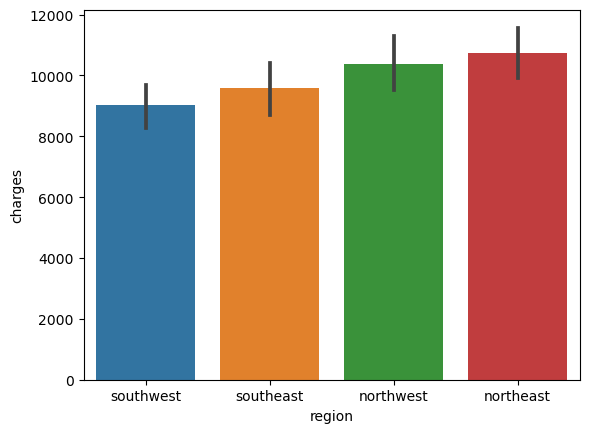

In [10]:

sns.barplot (x='region', y='charges', data= df)


Viendo el barplot que no tiene mucha diferencia  y comprobando también con el summary del pair pasado, concluimos que no es ordinal.

In [11]:
dummies2 = pd.get_dummies(df["region"], prefix_sep = "_", prefix = "region", dtype = int)
dummies2.head(2)

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0


In [12]:
df_dummies2 = pd.concat([df_dummies, dummies2], axis = 1)
df_dummies2.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,southwest,16884.9240,0.472641,-0.80,-0.228803,-0.5,1,1,0,0,0,0,1
1,18,male,33.77,1,no,southeast,1725.5523,0.018101,-0.84,0.503117,0.0,0,0,1,0,0,1,0


1 cuando es de esa región, 0 cuando no.

## Guardamos el df

In [13]:
df_dummies2.to_csv('data/df_encoding.csv')